In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazondataset/amazon.csv


# Informe de Análisis de Ventas en la Plataforma de Amazon

# Resumen:
### En este proyecto se realiza un análisis descriptivo de las ventas en la plataforma de Amazon, centrándose en la categoría de móviles. El objetivo es comprender los patrones de compra y las preferencias de los clientes en relación con las diferentes marcas de teléfonos móviles. Los datos se recopilaron de Amazon y se aplicaron técnicas de limpieza y análisis exploratorio para obtener información valiosa. Los resultados revelaron las marcas más populares, los precios promedio y las valoraciones de los clientes en la categoría de móviles. Estas conclusiones brindan una visión útil para las estrategias de venta y marketing en Amazon.

# Antecedentes:

### El análisis de ventas en plataformas de comercio electrónico, como Amazon, se ha vuelto crucial para comprender los patrones de compra y las tendencias del mercado. En este contexto, el análisis de datos y el machine learning ofrecen herramientas poderosas para extraer información valiosa de grandes conjuntos de datos. Existen numerosos estudios previos que han examinado las ventas en Amazon y han destacado la importancia de comprender las preferencias de los clientes y la influencia de las marcas en las decisiones de compra. Este proyecto se basa en la investigación existente y busca profundizar en el análisis de las ventas en la categoría de móviles en Amazon.



# Objetivos:

### Analizar las ventas en la categoría de móviles en la plataforma de Amazon.
### Identificar las marcas de teléfonos móviles más populares entre los clientes de Amazon.
### Determinar los precios promedio y las valoraciones de los clientes para las diferentes marcas de móviles.
### Proporcionar información útil para las estrategias de venta y marketing en la plataforma de Amazon.


In [2]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/kaggle/input/amazondataset/amazon.csv', sep=',')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
df2=df

### Eliminar las columnas que no sirven

In [5]:
df2 = df2.drop(['about_product', 'user_id', 'user_name',
             'review_id', 'review_title', 'review_content',
             'img_link', 'product_link'], axis=1)
df2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269"
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994"
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928"
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363"
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905"
...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090"
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118"
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031"


### Filtrar los datos

In [6]:
# Filtra los datos para mantener solo las filas que pertenecen a la categoría específica
categoria_especifica = 'Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones'
df3 = df2[df2['category'] == categoria_especifica]

df3 = df3.drop(['category'], axis=1)
df3


,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
338,B0BBN4DZBD,"Redmi A1 (Light Blue, 2GB RAM, 32GB Storage) |...","₹6,499","₹8,999",28%,4.0,"7,807"
339,B0B3CPQ5PF,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...","₹28,999","₹28,999",0%,4.3,"17,415"
340,B0B3CQBRB4,"OnePlus Nord 2T 5G (Gray Shadow, 8GB RAM, 128G...","₹28,999","₹28,999",0%,4.3,"17,415"
341,B0BBN56J5H,"Redmi A1 (Black, 2GB RAM, 32GB Storage) | Segm...","₹6,499","₹8,999",28%,4.0,"7,807"
342,B0BBN3WF7V,"Redmi A1 (Light Green, 2GB RAM 32GB ROM) | Seg...","₹6,499","₹8,999",28%,4.0,"7,807"
...,...,...,...,...,...,...,...
558,B09HSKYMB3,"MI REDMI 9i Sport (Carbon Black, 64 GB) (4 GB ...","₹7,915","₹9,999",21%,4.3,"1,376"
566,B09GFPN6TP,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...","₹7,499","₹9,499",21%,4.1,"3,13,832"
568,B08VB57558,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...","₹37,990","₹74,999",49%,4.2,"27,790"
572,B09NY6TRXG,"POCO C31 (Royal Blue, 64 GB) (4 GB RAM)","₹8,499","₹11,999",29%,3.9,276


### Cuantos modelos de movil tengo en la base

In [7]:
# Resetea el índice del DataFrame moviles_samsung
df3 = df3.reset_index(drop=True)

df3

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B0BBN4DZBD,"Redmi A1 (Light Blue, 2GB RAM, 32GB Storage) |...","₹6,499","₹8,999",28%,4.0,"7,807"
1,B0B3CPQ5PF,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...","₹28,999","₹28,999",0%,4.3,"17,415"
2,B0B3CQBRB4,"OnePlus Nord 2T 5G (Gray Shadow, 8GB RAM, 128G...","₹28,999","₹28,999",0%,4.3,"17,415"
3,B0BBN56J5H,"Redmi A1 (Black, 2GB RAM, 32GB Storage) | Segm...","₹6,499","₹8,999",28%,4.0,"7,807"
4,B0BBN3WF7V,"Redmi A1 (Light Green, 2GB RAM 32GB ROM) | Seg...","₹6,499","₹8,999",28%,4.0,"7,807"
...,...,...,...,...,...,...,...
63,B09HSKYMB3,"MI REDMI 9i Sport (Carbon Black, 64 GB) (4 GB ...","₹7,915","₹9,999",21%,4.3,"1,376"
64,B09GFPN6TP,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...","₹7,499","₹9,499",21%,4.1,"3,13,832"
65,B08VB57558,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...","₹37,990","₹74,999",49%,4.2,"27,790"
66,B09NY6TRXG,"POCO C31 (Royal Blue, 64 GB) (4 GB RAM)","₹8,499","₹11,999",29%,3.9,276


In [8]:
df4 = df3
df4

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B0BBN4DZBD,"Redmi A1 (Light Blue, 2GB RAM, 32GB Storage) |...","₹6,499","₹8,999",28%,4.0,"7,807"
1,B0B3CPQ5PF,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...","₹28,999","₹28,999",0%,4.3,"17,415"
2,B0B3CQBRB4,"OnePlus Nord 2T 5G (Gray Shadow, 8GB RAM, 128G...","₹28,999","₹28,999",0%,4.3,"17,415"
3,B0BBN56J5H,"Redmi A1 (Black, 2GB RAM, 32GB Storage) | Segm...","₹6,499","₹8,999",28%,4.0,"7,807"
4,B0BBN3WF7V,"Redmi A1 (Light Green, 2GB RAM 32GB ROM) | Seg...","₹6,499","₹8,999",28%,4.0,"7,807"
...,...,...,...,...,...,...,...
63,B09HSKYMB3,"MI REDMI 9i Sport (Carbon Black, 64 GB) (4 GB ...","₹7,915","₹9,999",21%,4.3,"1,376"
64,B09GFPN6TP,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...","₹7,499","₹9,499",21%,4.1,"3,13,832"
65,B08VB57558,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...","₹37,990","₹74,999",49%,4.2,"27,790"
66,B09NY6TRXG,"POCO C31 (Royal Blue, 64 GB) (4 GB RAM)","₹8,499","₹11,999",29%,3.9,276


In [9]:
# Filtrar las filas que contienen 'redmi' en la columna 'product_name'
moviles_redmi = df4[df4['product_name'].str.contains('redmi', case=False)]

#moviles_redmi = moviles_redmi.reset_index(drop=True)

moviles_redmi

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B0BBN4DZBD,"Redmi A1 (Light Blue, 2GB RAM, 32GB Storage) |...","₹6,499","₹8,999",28%,4.0,"7,807"
3,B0BBN56J5H,"Redmi A1 (Black, 2GB RAM, 32GB Storage) | Segm...","₹6,499","₹8,999",28%,4.0,"7,807"
4,B0BBN3WF7V,"Redmi A1 (Light Green, 2GB RAM 32GB ROM) | Seg...","₹6,499","₹8,999",28%,4.0,"7,807"
6,B09XB8GFBQ,"Redmi 10A (Charcoal Black, 4GB RAM, 64GB Stora...","₹8,999","₹11,999",25%,4.0,"12,796"
12,B09GFPVD9Y,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...","₹8,499","₹10,999",23%,4.1,"3,13,836"
13,B09GFLXVH9,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...","₹6,499","₹8,499",24%,4.1,"3,13,836"
14,B09XB7DPW1,"Redmi 10A (Sea Blue, 4GB RAM, 64GB Storage) | ...","₹8,999","₹11,999",25%,4.0,"12,796"
16,B09XB7SRQ5,"Redmi 10A (Slate Grey, 4GB RAM, 64GB Storage) ...","₹8,999","₹11,999",25%,4.0,"12,796"
19,B09T39K9YL,"Redmi Note 11 Pro + 5G (Stealth Black, 6GB RAM...","₹19,999","₹24,999",20%,3.9,"25,824"
29,B09QS8V5N8,"Redmi Note 11 (Space Black, 4GB RAM, 64GB Stor...","₹12,999","₹17,999",28%,4.1,"50,772"


In [10]:
# Resta la tabla de móviles redmi a la tabla original
df4 = df4.drop(moviles_redmi.index)

df4

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
1,B0B3CPQ5PF,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...","₹28,999","₹28,999",0%,4.3,"17,415"
2,B0B3CQBRB4,"OnePlus Nord 2T 5G (Gray Shadow, 8GB RAM, 128G...","₹28,999","₹28,999",0%,4.3,"17,415"
5,B0BMGB3CH9,"Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB St...","₹9,499","₹11,999",21%,4.2,284
7,B0BMGB2TPR,"Samsung Galaxy M04 Light Green, 4GB RAM, 64GB ...","₹9,499","₹11,999",21%,4.2,284
8,B09TWHTBKQ,"Samsung Galaxy M33 5G (Mystique Green, 8GB, 12...","₹18,499","₹25,999",29%,4.1,"22,318"
9,B0B4F2XCK3,"Samsung Galaxy M13 (Aqua Green, 6GB, 128GB Sto...","₹12,999","₹17,999",28%,4.1,"18,998"
10,B09TWH8YHM,"Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128...","₹16,999","₹24,999",32%,4.1,"22,318"
11,B07WGMMQGP,"iQOO vivo Z6 5G (Chromatic Blue, 6GB RAM, 128G...","₹16,499","₹20,999",21%,4.0,"21,350"
15,B07WJV6P1R,"iQOO Z6 Lite 5G by vivo (Stellar Green, 6GB RA...","₹15,499","₹18,999",18%,4.1,"19,252"
17,B09RMQYHLH,"realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...","₹12,999","₹15,999",19%,4.2,"13,246"


In [11]:
# Filtrar las filas que contienen 'oneplus' en la columna 'product_name'
moviles_oneplus = df4[df4['product_name'].str.contains('oneplus', case=False)]


moviles_oneplus, 


(    product_id                                       product_name  \
 1   B0B3CPQ5PF  OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...   
 2   B0B3CQBRB4  OnePlus Nord 2T 5G (Gray Shadow, 8GB RAM, 128G...   
 23  B0B3D39RKV  OnePlus Nord 2T 5G (Jade Fog, 12GB RAM, 256GB ...   
 25  B09WRMNJ9G  OnePlus 10R 5G (Forest Green, 8GB RAM, 128GB S...   
 58  B0B5V47VK4  OnePlus 10T 5G (Moonstone Black, 8GB RAM, 128G...   
 
    discounted_price actual_price discount_percentage rating rating_count  
 1           ₹28,999      ₹28,999                  0%    4.3       17,415  
 2           ₹28,999      ₹28,999                  0%    4.3       17,415  
 23          ₹33,999      ₹33,999                  0%    4.3       17,415  
 25          ₹34,999      ₹38,999                 10%    4.2       11,029  
 58          ₹44,999      ₹49,999                 10%    4.3        3,075  ,)

In [12]:
# Resta la tabla de móviles redmi a la tabla original
df4 = df4.drop(moviles_oneplus.index)

df4

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
5,B0BMGB3CH9,"Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB St...","₹9,499","₹11,999",21%,4.2,284
7,B0BMGB2TPR,"Samsung Galaxy M04 Light Green, 4GB RAM, 64GB ...","₹9,499","₹11,999",21%,4.2,284
8,B09TWHTBKQ,"Samsung Galaxy M33 5G (Mystique Green, 8GB, 12...","₹18,499","₹25,999",29%,4.1,"22,318"
9,B0B4F2XCK3,"Samsung Galaxy M13 (Aqua Green, 6GB, 128GB Sto...","₹12,999","₹17,999",28%,4.1,"18,998"
10,B09TWH8YHM,"Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128...","₹16,999","₹24,999",32%,4.1,"22,318"
11,B07WGMMQGP,"iQOO vivo Z6 5G (Chromatic Blue, 6GB RAM, 128G...","₹16,499","₹20,999",21%,4.0,"21,350"
15,B07WJV6P1R,"iQOO Z6 Lite 5G by vivo (Stellar Green, 6GB RA...","₹15,499","₹18,999",18%,4.1,"19,252"
17,B09RMQYHLH,"realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...","₹12,999","₹15,999",19%,4.2,"13,246"
18,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...","₹15,490","₹20,990",26%,4.2,"32,916"
20,B07WDKLDRX,"iQOO Neo 6 5G (Dark Nova, 8GB RAM, 128GB Stora...","₹28,999","₹34,999",17%,4.4,"20,311"


In [13]:
# Filtrar las filas que contienen 'samsung' en la columna 'product_name'
moviles_samsung = df4[df4['product_name'].str.contains('samsung', case=False)]


moviles_samsung, 

# Resta la tabla de móviles samsung a la tabla original
df4 = df4.drop(moviles_samsung.index)

df4

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
11,B07WGMMQGP,"iQOO vivo Z6 5G (Chromatic Blue, 6GB RAM, 128G...","₹16,499","₹20,999",21%,4.0,"21,350"
15,B07WJV6P1R,"iQOO Z6 Lite 5G by vivo (Stellar Green, 6GB RA...","₹15,499","₹18,999",18%,4.1,"19,252"
17,B09RMQYHLH,"realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...","₹12,999","₹15,999",19%,4.2,"13,246"
18,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...","₹15,490","₹20,990",26%,4.2,"32,916"
20,B07WDKLDRX,"iQOO Neo 6 5G (Dark Nova, 8GB RAM, 128GB Stora...","₹28,999","₹34,999",17%,4.4,"20,311"
22,B07WDKLRM4,"iQOO Z6 44W by vivo (Lumina Blue, 4GB RAM, 128...","₹13,999","₹19,999",30%,4.1,"19,252"
31,B07WHQWXL7,"iQOO Z6 44W by vivo (Lumina Blue, 6GB RAM, 128...","₹15,499","₹20,999",26%,4.1,"19,252"
32,B07WDK3ZS6,"iQOO Z6 Lite 5G by vivo (Mystic Night, 6GB RAM...","₹15,499","₹18,999",18%,4.1,"19,252"
34,B09FKDH6FS,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...","₹7,499","₹7,999",6%,4.0,"30,907"
35,B07WGPKTS4,"iQOO Z6 44W by vivo (Raven Black, 4GB RAM, 128...","₹13,999","₹19,999",30%,4.1,"19,252"


In [14]:
# Filtrar las filas que contienen 'samsung' en la columna 'product_name'
moviles_iqoo = df4[df4['product_name'].str.contains('iqoo', case=False)]


moviles_iqoo, 

# Resta la tabla de móviles samsung a la tabla original
df4 = df4.drop(moviles_iqoo.index)

df4

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
17,B09RMQYHLH,"realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...","₹12,999","₹15,999",19%,4.2,"13,246"
18,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...","₹15,490","₹20,990",26%,4.2,"32,916"
34,B09FKDH6FS,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...","₹7,499","₹7,999",6%,4.0,"30,907"
37,B08VB2CMR3,"OPPO A74 5G (Fluid Black, 6GB RAM, 128GB Stora...","₹15,490","₹20,990",26%,4.2,"32,916"
39,B08444S68L,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...","₹12,490","₹15,990",22%,4.2,"58,506"
44,B0B56YRBNT,"Tecno Spark 9 (Sky Mirror, 6GB RAM,128GB Stora...","₹8,999","₹13,499",33%,3.8,"3,145"
56,B09MKP344P,"Tecno Spark 8T (Turquoise Cyan, 4GB RAM,64GB S...","₹8,499","₹12,999",35%,4.1,"6,662"
61,B09NY7W8YD,"POCO C31 (Shadow Gray, 64 GB) (4 GB RAM)","₹7,998","₹11,999",33%,3.8,125
66,B09NY6TRXG,"POCO C31 (Royal Blue, 64 GB) (4 GB RAM)","₹8,499","₹11,999",29%,3.9,276


In [15]:
# Filtrar las filas que contienen 'realme' en la columna 'product_name'
moviles_realme = df4[df4['product_name'].str.contains('realme', case=False)]


moviles_realme, 

# Resta la tabla de móviles realme a la tabla original
df4 = df4.drop(moviles_realme.index)

df4

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
18,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...","₹15,490","₹20,990",26%,4.2,"32,916"
37,B08VB2CMR3,"OPPO A74 5G (Fluid Black, 6GB RAM, 128GB Stora...","₹15,490","₹20,990",26%,4.2,"32,916"
39,B08444S68L,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...","₹12,490","₹15,990",22%,4.2,"58,506"
44,B0B56YRBNT,"Tecno Spark 9 (Sky Mirror, 6GB RAM,128GB Stora...","₹8,999","₹13,499",33%,3.8,"3,145"
56,B09MKP344P,"Tecno Spark 8T (Turquoise Cyan, 4GB RAM,64GB S...","₹8,499","₹12,999",35%,4.1,"6,662"
61,B09NY7W8YD,"POCO C31 (Shadow Gray, 64 GB) (4 GB RAM)","₹7,998","₹11,999",33%,3.8,125
66,B09NY6TRXG,"POCO C31 (Royal Blue, 64 GB) (4 GB RAM)","₹8,499","₹11,999",29%,3.9,276


In [16]:
# Filtrar las filas que contienen 'oppo' en la columna 'product_name'
moviles_oppo = df4[df4['product_name'].str.contains('oppo', case=False)]


moviles_oppo, 

# Resta la tabla de móviles realme a la tabla original
df4 = df4.drop(moviles_oppo.index)

df4

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
44,B0B56YRBNT,"Tecno Spark 9 (Sky Mirror, 6GB RAM,128GB Stora...","₹8,999","₹13,499",33%,3.8,"3,145"
56,B09MKP344P,"Tecno Spark 8T (Turquoise Cyan, 4GB RAM,64GB S...","₹8,499","₹12,999",35%,4.1,"6,662"
61,B09NY7W8YD,"POCO C31 (Shadow Gray, 64 GB) (4 GB RAM)","₹7,998","₹11,999",33%,3.8,125
66,B09NY6TRXG,"POCO C31 (Royal Blue, 64 GB) (4 GB RAM)","₹8,499","₹11,999",29%,3.9,276


In [17]:
# Filtrar las filas que contienen 'otecno spark' en la columna 'product_name'
moviles_tecno = df4[df4['product_name'].str.contains('tecno', case=False)]


moviles_tecno, 

# Resta la tabla de móviles realme a la tabla original
df4 = df4.drop(moviles_tecno.index)

df4

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
61,B09NY7W8YD,"POCO C31 (Shadow Gray, 64 GB) (4 GB RAM)","₹7,998","₹11,999",33%,3.8,125
66,B09NY6TRXG,"POCO C31 (Royal Blue, 64 GB) (4 GB RAM)","₹8,499","₹11,999",29%,3.9,276


In [18]:
moviles_poco = df4

moviles_poco

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count
61,B09NY7W8YD,"POCO C31 (Shadow Gray, 64 GB) (4 GB RAM)","₹7,998","₹11,999",33%,3.8,125
66,B09NY6TRXG,"POCO C31 (Royal Blue, 64 GB) (4 GB RAM)","₹8,499","₹11,999",29%,3.9,276


### Agregacion de la columna modelo

In [19]:

moviles_redmi = moviles_redmi.reset_index(drop=True)
moviles_oneplus = moviles_oneplus.reset_index(drop=True)
moviles_samsung = moviles_samsung.reset_index(drop=True)
moviles_iqoo = moviles_iqoo.reset_index(drop=True)
moviles_realme = moviles_redmi.reset_index(drop=True)
moviles_realme = moviles_realme.reset_index(drop=True)
moviles_oppo = moviles_oppo.reset_index(drop=True)
moviles_tecno = moviles_tecno.reset_index(drop=True)


moviles_redmi['modelo'] = 'redmi'
moviles_oneplus['modelo'] = 'oneplus'
moviles_samsung['modelo'] = 'samsung'
moviles_iqoo['modelo'] = 'iqoo'
moviles_realme['modelo'] = 'reealme'
moviles_oppo['modelo'] = 'oppo'
moviles_tecno['modelo'] = 'tecno spark'

In [20]:
# Combina los DataFrames en uno solo
df5 = pd.concat([moviles_redmi, moviles_oneplus, moviles_samsung,
                        moviles_iqoo, moviles_realme, moviles_oppo, moviles_tecno])

df5 = df5.reset_index(drop=True)

df5

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,modelo
0,B0BBN4DZBD,"Redmi A1 (Light Blue, 2GB RAM, 32GB Storage) |...","₹6,499","₹8,999",28%,4.0,"7,807",redmi
1,B0BBN56J5H,"Redmi A1 (Black, 2GB RAM, 32GB Storage) | Segm...","₹6,499","₹8,999",28%,4.0,"7,807",redmi
2,B0BBN3WF7V,"Redmi A1 (Light Green, 2GB RAM 32GB ROM) | Seg...","₹6,499","₹8,999",28%,4.0,"7,807",redmi
3,B09XB8GFBQ,"Redmi 10A (Charcoal Black, 4GB RAM, 64GB Stora...","₹8,999","₹11,999",25%,4.0,"12,796",redmi
4,B09GFPVD9Y,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...","₹8,499","₹10,999",23%,4.1,"3,13,836",redmi
...,...,...,...,...,...,...,...,...
82,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...","₹15,490","₹20,990",26%,4.2,"32,916",oppo
83,B08VB2CMR3,"OPPO A74 5G (Fluid Black, 6GB RAM, 128GB Stora...","₹15,490","₹20,990",26%,4.2,"32,916",oppo
84,B08444S68L,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...","₹12,490","₹15,990",22%,4.2,"58,506",oppo
85,B0B56YRBNT,"Tecno Spark 9 (Sky Mirror, 6GB RAM,128GB Stora...","₹8,999","₹13,499",33%,3.8,"3,145",tecno spark


In [21]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           87 non-null     object
 1   product_name         87 non-null     object
 2   discounted_price     87 non-null     object
 3   actual_price         87 non-null     object
 4   discount_percentage  87 non-null     object
 5   rating               87 non-null     object
 6   rating_count         87 non-null     object
 7   modelo               87 non-null     object
dtypes: object(8)
memory usage: 5.6+ KB


In [22]:
df6 = df5
df6

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,modelo
0,B0BBN4DZBD,"Redmi A1 (Light Blue, 2GB RAM, 32GB Storage) |...","₹6,499","₹8,999",28%,4.0,"7,807",redmi
1,B0BBN56J5H,"Redmi A1 (Black, 2GB RAM, 32GB Storage) | Segm...","₹6,499","₹8,999",28%,4.0,"7,807",redmi
2,B0BBN3WF7V,"Redmi A1 (Light Green, 2GB RAM 32GB ROM) | Seg...","₹6,499","₹8,999",28%,4.0,"7,807",redmi
3,B09XB8GFBQ,"Redmi 10A (Charcoal Black, 4GB RAM, 64GB Stora...","₹8,999","₹11,999",25%,4.0,"12,796",redmi
4,B09GFPVD9Y,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...","₹8,499","₹10,999",23%,4.1,"3,13,836",redmi
...,...,...,...,...,...,...,...,...
82,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...","₹15,490","₹20,990",26%,4.2,"32,916",oppo
83,B08VB2CMR3,"OPPO A74 5G (Fluid Black, 6GB RAM, 128GB Stora...","₹15,490","₹20,990",26%,4.2,"32,916",oppo
84,B08444S68L,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...","₹12,490","₹15,990",22%,4.2,"58,506",oppo
85,B0B56YRBNT,"Tecno Spark 9 (Sky Mirror, 6GB RAM,128GB Stora...","₹8,999","₹13,499",33%,3.8,"3,145",tecno spark


In [23]:
import re
# Supongamos que 'columna1' es una columna que contiene valores como '₹15,490'

def limpiar_valor(valor):
    # Eliminar símbolos y caracteres no numéricos
    valor_limpio = re.sub(r'[^\d.]', '', valor)
    return valor_limpio

# Aplicar la limpieza a las columnas deseadas
df6['discounted_price'] = pd.to_numeric(df6['discounted_price'].apply(limpiar_valor), errors='coerce')
df6['actual_price'] = pd.to_numeric(df6['actual_price'].apply(limpiar_valor), errors='coerce')
df6['discount_percentage'] = pd.to_numeric(df6['discount_percentage'].apply(limpiar_valor), errors='coerce')
df6['rating'] = pd.to_numeric(df6['rating'].apply(limpiar_valor), errors='coerce')
df6['rating_count'] = pd.to_numeric(df6['rating_count'].apply(limpiar_valor), errors='coerce')

df6

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,modelo
0,B0BBN4DZBD,"Redmi A1 (Light Blue, 2GB RAM, 32GB Storage) |...",6499,8999,28,4.0,7807,redmi
1,B0BBN56J5H,"Redmi A1 (Black, 2GB RAM, 32GB Storage) | Segm...",6499,8999,28,4.0,7807,redmi
2,B0BBN3WF7V,"Redmi A1 (Light Green, 2GB RAM 32GB ROM) | Seg...",6499,8999,28,4.0,7807,redmi
3,B09XB8GFBQ,"Redmi 10A (Charcoal Black, 4GB RAM, 64GB Stora...",8999,11999,25,4.0,12796,redmi
4,B09GFPVD9Y,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",8499,10999,23,4.1,313836,redmi
...,...,...,...,...,...,...,...,...
82,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...",15490,20990,26,4.2,32916,oppo
83,B08VB2CMR3,"OPPO A74 5G (Fluid Black, 6GB RAM, 128GB Stora...",15490,20990,26,4.2,32916,oppo
84,B08444S68L,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...",12490,15990,22,4.2,58506,oppo
85,B0B56YRBNT,"Tecno Spark 9 (Sky Mirror, 6GB RAM,128GB Stora...",8999,13499,33,3.8,3145,tecno spark


In [24]:
df6.isnull().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
modelo                 0
dtype: int64

In [25]:
df6.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
discounted_price,87.0,15088.505747,7606.616257,6499.0,8999.0,13999.0,16999.0,44999.0
actual_price,87.0,19693.471264,10120.637142,7999.0,11999.0,18999.0,21494.5,74999.0
discount_percentage,87.0,23.379310,7.831424,0.0,19.5,25.0,28.0,49.0
rating,87.0,4.089655,0.120111,3.8,4.0,4.1,4.1,4.4
rating_count,87.0,47673.816092,86379.480697,284.0,9499.0,19252.0,31822.0,313836.0


In [26]:
 df6.groupby('modelo').describe().transpose()



modelo                             iqoo       oneplus          oppo  \
discounted_price    count     14.000000      5.000000      3.000000   
                    mean   18712.642857  34399.000000  14490.000000   
                    std     5122.755232   6542.170894   1732.050808   
                    min    13999.000000  28999.000000  12490.000000   
                    25%    15499.000000  28999.000000  13990.000000   
                    50%    16499.000000  33999.000000  15490.000000   
                    75%    20749.000000  34999.000000  15490.000000   
                    max    29990.000000  44999.000000  15490.000000   
actual_price        count     14.000000      5.000000      3.000000   
                    mean   24780.857143  36199.000000  19323.333333   
                    std     6667.696394   8757.853618   2886.751346   
                    min    18999.000000  28999.000000  15990.000000   
                    25%    20246.750000  28999.000000  18490.000000   
                    50%    20999.000000  33999.000000  20990.000000   
                    75%    29490.000000  38999.000000  20990.000000   
                    max    39990.000000  49999.000000  20990.000000   
discount_percentage count     14.000000      5.000000      3.000000   
                    mean      24.214286      4.000000     24.666667   
                    std        5.206188      5.477226      2.309401   
                    min       17.000000      0.000000     22.000000   
                    25%       18.750000      0.000000     24.000000   
                    50%       25.500000      0.000000     26.000000   
                    75%       29.750000     10.000000     26.000000   
                    max       30.000000     10.000000     26.000000   
rating              count     14.000000      5.000000      3.000000   
                    mean       4.157143      4.280000      4.200000   
                    std        0.134246      0.044721      0.000000   
                    min        4.000000      4.200000      4.200000   
                    25%        4.100000      4.300000      4.200000   
                    50%        4.100000      4.300000      4.200000   
                    75%        4.300000      4.300000      4.200000   
                    max        4.400000      4.300000      4.200000   
rating_count        count     14.000000      5.000000      3.000000   
                    mean   16912.142857  13269.800000  41446.000000   
                    std     5120.305653   6334.492497  14774.393389   
                    min     8399.000000   3075.000000  32916.000000   
                    25%    11937.250000  11029.000000  32916.000000   
                    50%    19252.000000  17415.000000  32916.000000   
                    75%    20046.500000  17415.000000  45711.000000   
                    max    21350.000000  17415.000000  58506.000000   

modelo                             redmi        reealme       samsung  \
discounted_price    count      23.000000      23.000000     17.000000   
                    mean    12104.043478   12104.043478  15351.411765   
                    std      5135.328931    5135.328931   6876.021661   
                    min      6499.000000    6499.000000   9499.000000   
                    25%      7707.000000    7707.000000  10999.000000   
                    50%     12999.000000   12999.000000  13999.000000   
                    75%     15499.000000   15499.000000  16999.000000   
                    max     22999.000000   22999.000000  37990.000000   
actual_price        count      23.000000      23.000000     17.000000   
                    mean    15694.652174   15694.652174  22293.117647   
                    std      6372.417713    6372.417713  14709.753167   
                    min      7999.000000    7999.000000  11999.000000   
                    25%      9749.000000    9749.000000  14999.000000   
                    50%     15999.000000   15999.000000  19499.000

# Resultados

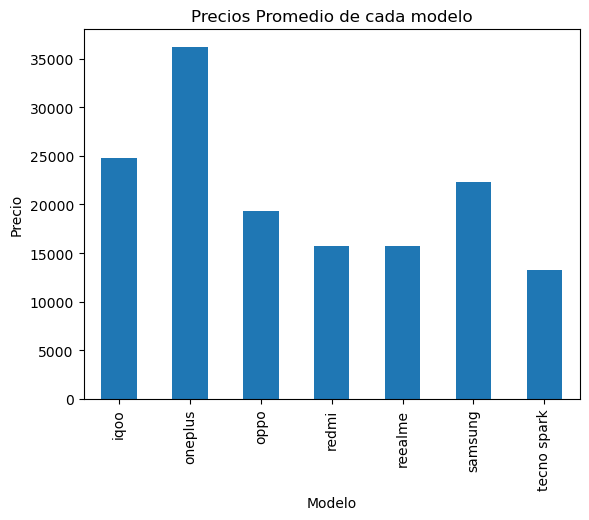

In [27]:
#Grafico de barras por precio promedio actual
import matplotlib.pyplot as plt

# Gráfico de barras agrupado por modelo
df6.groupby('modelo')['actual_price'].mean().plot(kind='bar')
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.title('Precios Promedio de cada modelo')
plt.show()


### El gráfico de barras revela diferencias significativas en los precios promedio de estos modelos. Se observa que el modelo OnePlus tiene el precio promedio más alto, seguido de iQOO y Samsung. Por otro lado, Tecno Spark muestra el precio promedio más bajo.

### Estos resultados proporcionan una visión general de la variación en los precios de los diferentes modelos de teléfonos móviles en la plataforma de Amazon. Los precios promedio pueden estar influenciados por varios factores, como las características, la marca y la demanda del mercado.

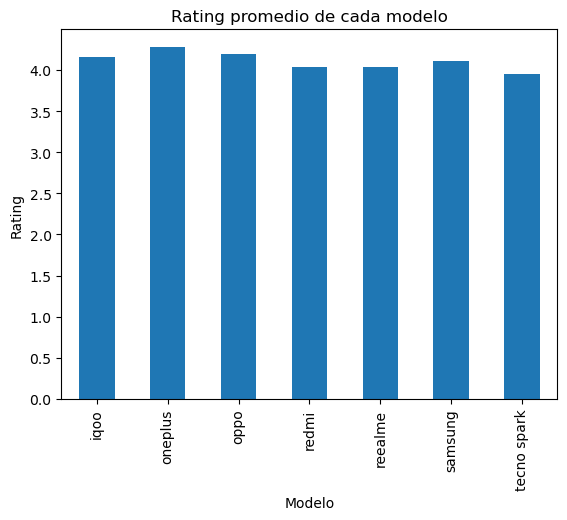

In [28]:
#Grafico de barras por rating
import matplotlib.pyplot as plt

# Gráfico de barras agrupado por modelo
df6.groupby('modelo')['rating'].mean().plot(kind='bar')
plt.xlabel('Modelo')
plt.ylabel('Rating')
plt.title('Rating promedio de cada modelo')
plt.show()

### Aqui se observa que OnePlus tiene mas rating en comparacion con los otros modelos esto puede deberse a varios factosres algunos de ellos son: materiales, Rendimiento y velocidad, Comunidad y soporte de usuarios entre otros

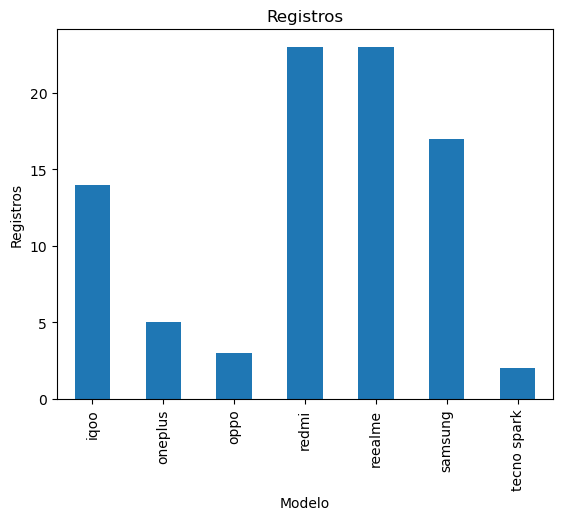

In [29]:
#Grafico de barras cuantos datos tengo
import matplotlib.pyplot as plt

# Gráfico de barras agrupado por modelo
df6.groupby('modelo')['rating'].count().plot(kind='bar')
plt.xlabel('Modelo')
plt.ylabel('Registros')
plt.title('Registros')
plt.show()

### El gráfico de barras resalta la distribución del número de registros para cada modelo en la base de datos. Se observa que los modelos Redmi y Realme tienen el mayor número de registros, seguidos de Samsung. Esto indica que estos modelos son populares entre los usuarios y tienen una presencia significativa en la plataforma de Amazon.

### El número de registros puede reflejar la demanda y la popularidad de cada modelo, lo que puede influir en la disponibilidad y la visibilidad en la plataforma de Amazon.

# Coclusion

### Distribución de modelos: La base de datos analizada revela que los modelos más representados son Redmi, Realme y Samsung, con un alto número de registros. Esto indica que estos modelos son populares y tienen una presencia significativa en la plataforma.

### Precio promedio: Al examinar el precio promedio de los modelos, se observa que OnePlus tiene el precio promedio más alto, seguido de Samsung e iQOO. Esto sugiere que los modelos de OnePlus podrían estar posicionados en un segmento de precio premium.

### Rating promedio: El análisis revela que OnePlus tiene el rating promedio más alto entre los modelos analizados. Esto indica que los clientes perciben a los dispositivos OnePlus de manera favorable en términos de calidad, rendimiento y experiencia de usuario.

### Estos resultados sugieren que los modelos de OnePlus han logrado ganar una buena reputación entre los usuarios en la plataforma de Amazon. Sin embargo, es importante tener en cuenta que estas conclusiones se basan en el conjunto de datos y el análisis realizado hasta el momento.